<a href="https://colab.research.google.com/github/Valeeew/Analyze-bookstore-sales/blob/main/correlation_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Analyse & corrélation__
>## __Par Valentin Monteiro__

> > ## Sources:
Cours sur les statistiques (youtube): <br>
[GO >>>](https://www.youtube.com/watch?v=ewtoSal-HQY&list=PLKOH07GkcIqfDqa3V5BF0tVvef3Y9Y11R)
<br><br>
Tuto regression linéaire :<br>
[GO >>>](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/td2a_eco_regressions_lineaires.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!git clone -l -s https://github.com/Valeeew/Analyze-bookstore-sales cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 76 (delta 44), reused 16 (delta 6), pack-reused 0
Unpacking objects: 100% (76/76), done.
/content/cloned-repo
correlation_testing.ipynb  DATA_library.csv	transactions.csv
customers.csv		   products.csv		Turnover_analyze.ipynb
DATA_cleaning.ipynb	   Sales_analyze.ipynb


In [3]:
df = pd.read_csv("DATA_library.csv", index_col="date", parse_dates=True)
# Je decide de supprimer le 4 gros client, je pense que ces DATA peut avoir une net influence sur me corrélation
df = df.drop("Unnamed: 0", axis=1)
dfall = df 
df = df[(df.client_id.isin(["c_1609","c_3454","c_4958","c_6714"]))==False]


## __Test de Corrélation ; Sexe & Catégorie__

> Avec pour hypothèse H0 ➡️ les 2 variable sont indépendantes, donc pas corrélé.
<br> Seuil de risque fixé à 5% d'erreur

In [4]:
# Création table pivot (tableau croisé)
corr_sex_categ = df[["sex","categ"]].pivot_table(index="sex",columns="categ", aggfunc=len, margins=True, margins_name="Total")

In [5]:
# Test de Khi2 car les deux variable sont des qualitative
from scipy import stats #as chi2_contingency
khi2, p_value, dof, exp = stats.chi2_contingency(corr_sex_categ)

In [6]:
print("khi2 =",khi2,"\np_value =", p_value)

khi2 = 20.200173796862927 
p_value = 0.002551063708568263


In [7]:
dof

6

In [8]:
expectation = pd.DataFrame(exp, index=["f","m","Total"], columns=["0.0","1.0","2.0","Total"])
np_corr_sex_categ = corr_sex_categ.to_numpy()
np_corr_sex_categ

array([[200904, 111331,  16980, 329215],
       [186589, 101017,  15868, 303474],
       [387493, 212348,  32848, 632689]])

In [9]:
corr_sex_categ

categ,0.0,1.0,2.0,Total
sex,,,,
f,200904,111331,16980,329215
m,186589,101017,15868,303474
Total,387493,212348,32848,632689


In [10]:
x2 = ((np_corr_sex_categ-exp)**2)/exp

In [11]:
x2 = pd.DataFrame(x2, index=["f","m","Total_y"], columns=("0","1","2","Total_x"))
#x2 = x2.drop("Total_y")
#x2 = x2.drop("Total_x", axis=1)
x2 

,0,1,2,Total_x
f,2.607546,6.344940,0.736678,0.0
m,2.828720,6.883125,0.799164,0.0
Total_y,0.000000,0.000000,0.000000,0.0


In [12]:
mesure = x2.sum().sum()

In [13]:
reslt = exp/x2.to_numpy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [14]:
reslt = x2/mesure
reslt = reslt.drop("Total_y")
reslt = reslt.drop("Total_x", axis=1)

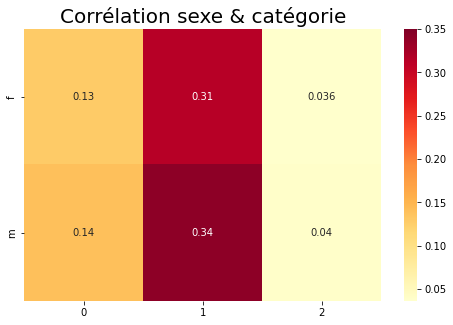

In [15]:
plt.figure(figsize=[8,5])
sns.heatmap(reslt, cmap=("YlOrRd"), annot=reslt, vmax=0.35)
plt.title("Corrélation sexe & catégorie", fontsize = 20)
plt.savefig("correation_sex_categ.png")

## __Test de corrélation ; Age & C.A.__
> Test de Spearman
<br>H0 ➡️ Refus de corrélation
<br> Seuil de risque fixé à 5% d'erreur


In [16]:
corr_age_ca = df[["age","price"]]
corr_age_ca = corr_age_ca.groupby("age").agg({"price":"sum"}).reset_index()
np_corr_age_ca = corr_age_ca.to_numpy()
corr_age_ca

,age,price
0,19,609013.690000
1,20,178195.780000
2,21,184209.264564
3,22,178497.700000
4,23,165029.256376
...,...,...
71,90,5264.988188
72,91,5043.190000
73,92,2815.450000
74,93,4013.870000


<function matplotlib.pyplot.show>

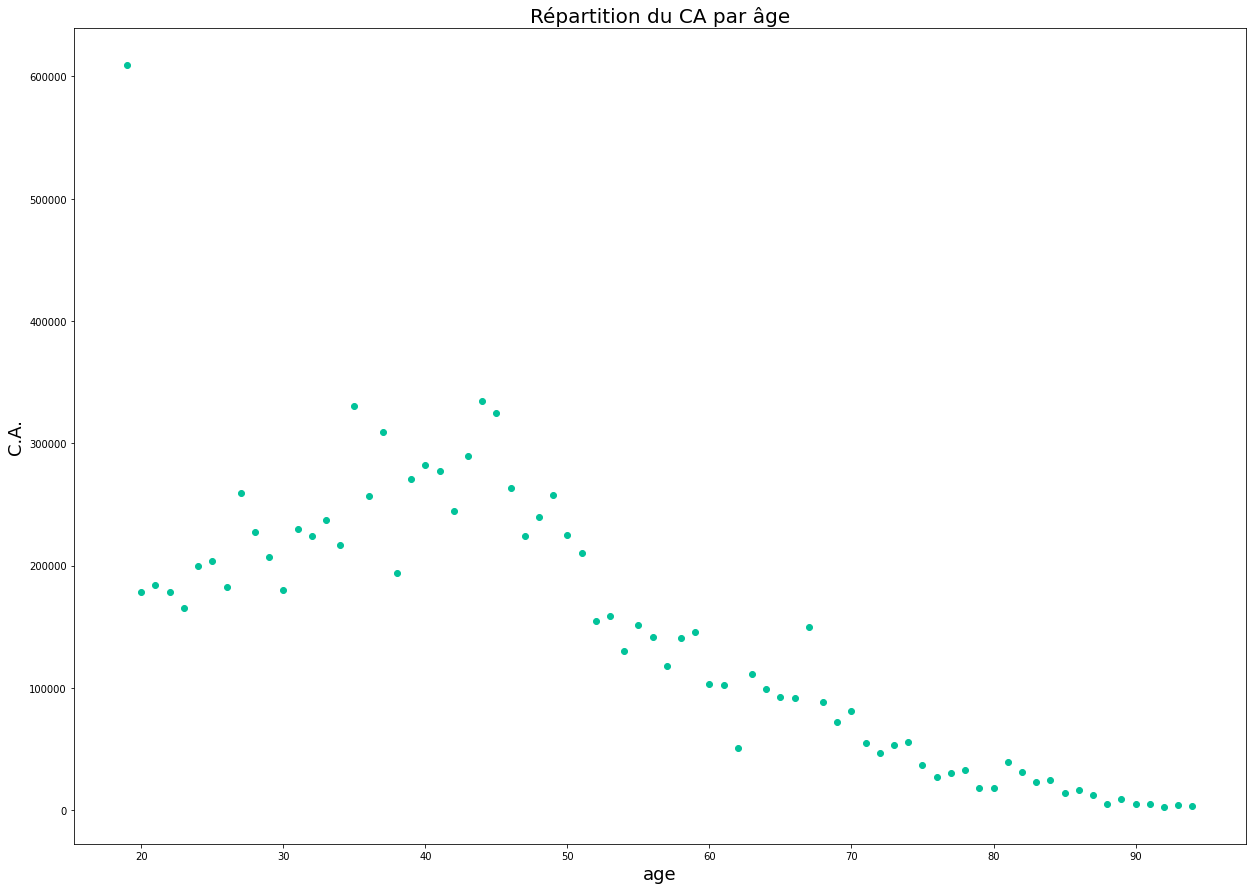

In [17]:
plt.figure(figsize=[21,15])
plt.plot(corr_age_ca.age,corr_age_ca.price,"o", color="#02c39a")
plt.xlabel("age", fontsize=18)
plt.ylabel("C.A.", fontsize=18)
plt.title("Répartition du CA par âge", fontsize=20)
plt.savefig("repartition_ca_age.png")
plt.show

In [18]:
coefcorr_age_ca , p_value = stats.spearmanr(corr_age_ca.age,corr_age_ca.price)

In [19]:
p_value

7.352708223159905e-25

In [20]:
coefcorr_age_ca

-0.8736842105263158

## __Test de corrélation ; Age & fréquence d'achat__
> Test ANOVA<br>
si HO à 5%, le test est lié au hasard

In [21]:
corr_age_freq = df[["class_age","session_id","client_id"]]
freq = corr_age_freq.groupby("class_age").resample("M").agg({"session_id":"count", "client_id":pd.Series.nunique})
freq["freq"] = freq.session_id/freq.client_id 
#freq = freq.groupby("class_age").agg({"freq":"mean"})
freq = freq.drop(["session_id","client_id"],axis=1)
freq = freq.reset_index()
freq = freq.drop("date", axis=1)
freq

,class_age,freq
0,19-24,2.657194
1,19-24,2.621291
2,19-24,2.564489
3,19-24,2.792619
4,19-24,2.753467
...,...,...
355,90-94,3.071429
356,90-94,3.800000
357,90-94,3.823529
358,90-94,3.823529


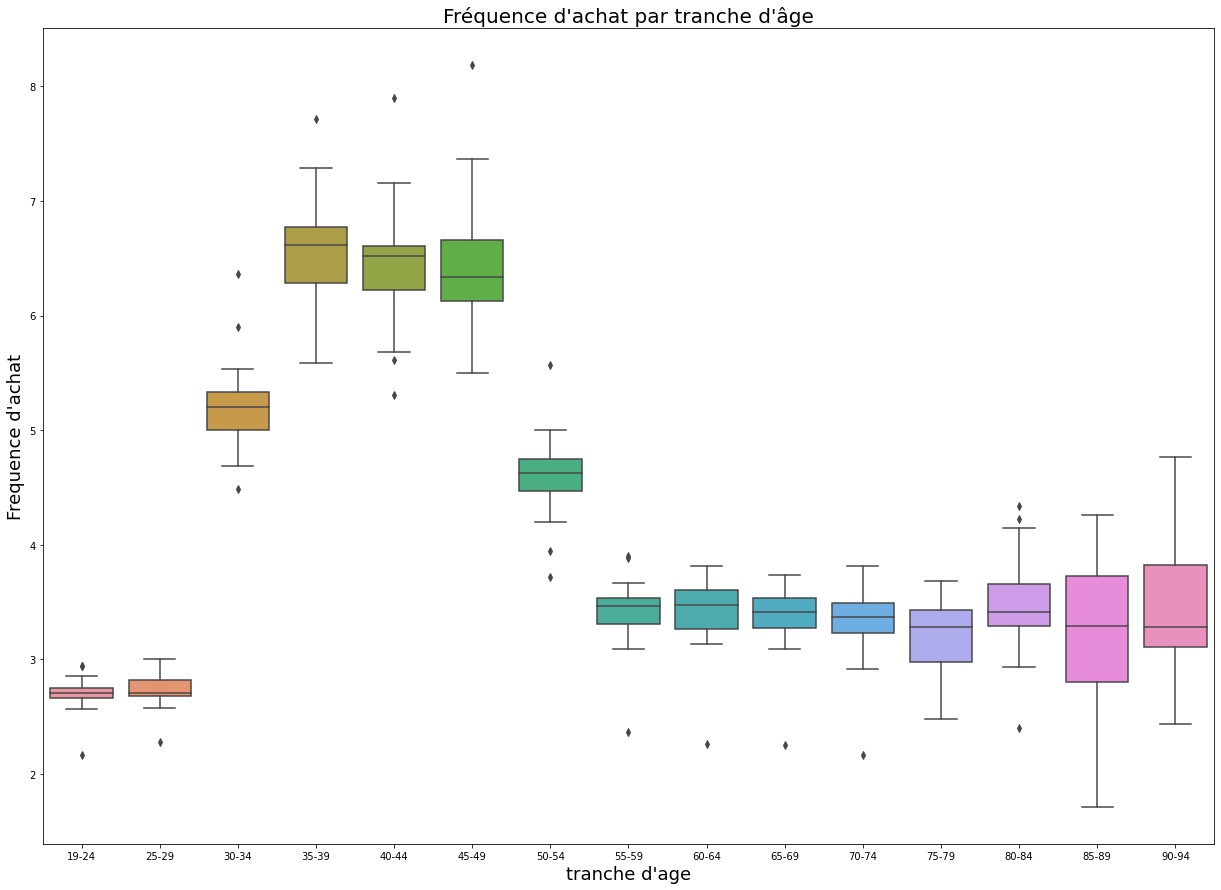

In [22]:
plt.figure(figsize=[21,15])
sns.boxplot(data=freq, x=freq.class_age, y=freq.freq)
plt.title("Fréquence d'achat par tranche d'âge", fontsize=20)
plt.xlabel("tranche d'age", fontsize=18)
plt.ylabel("Frequence d'achat", fontsize=18)
plt.savefig("frequence_achat_age.png")

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('freq ~ class_age', data = freq).fit()
# aov = sm.stats.anova_lm(mod, type=2)
print(mod.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                   freq   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     271.1
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          1.70e-176
Time:                        15:57:55   Log-Likelihood:                -182.15
No. Observations:                 360   AIC:                             394.3
Df Residuals:                     345   BIC:                             452.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.6982      0

## __Test de corrélation ; Age & Panier moyen__
> Test ANOVA<br>
si HO à 5%, le test est lié au hasard

In [24]:
def basket(data):
  fdf = {}
  fdf["basket"] = (data["price"].sum()/data["session_id"].count())
  return pd.Series(fdf, index=["basket"])

In [25]:
df_panier = df.groupby("class_age").resample("M").apply(basket)

In [26]:
df_panier = df_panier.reset_index()

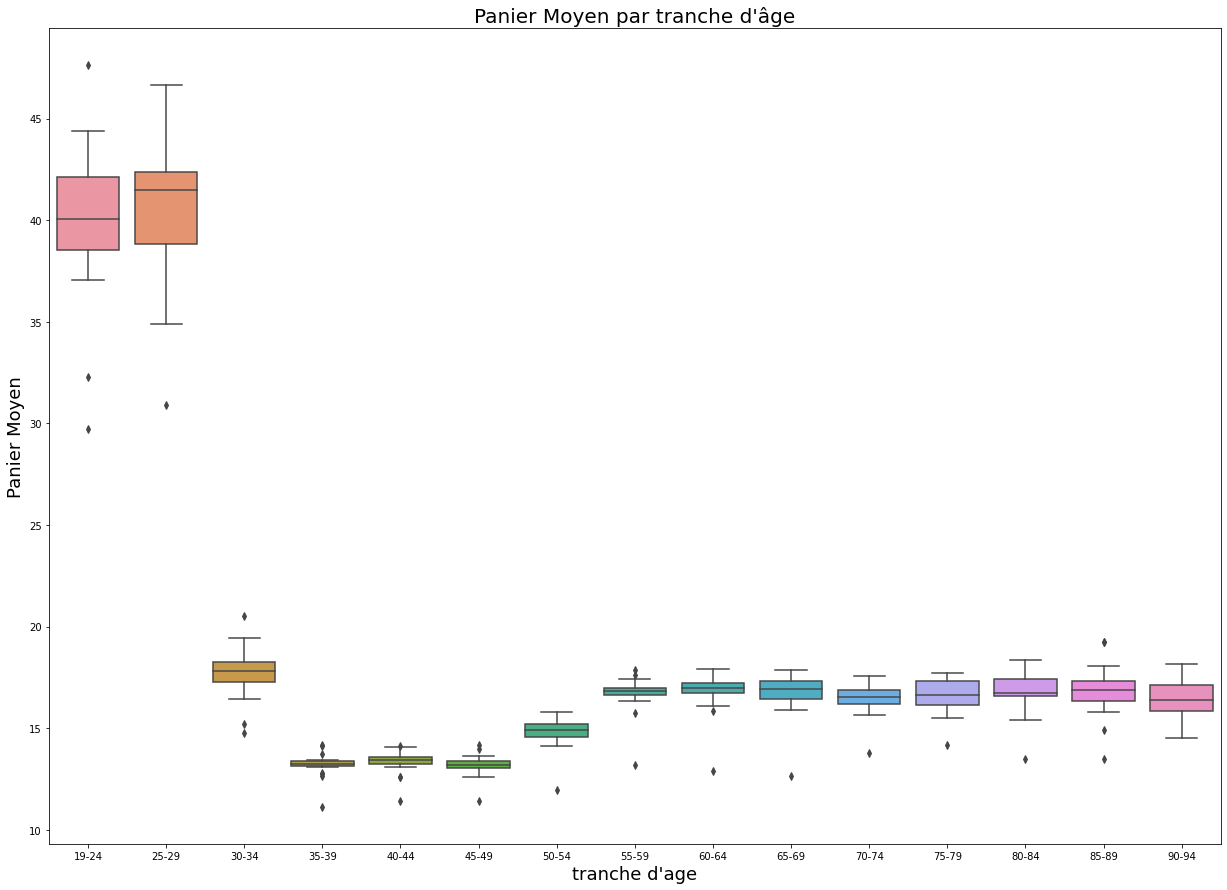

In [27]:
plt.figure(figsize=[21,15])
sns.boxplot(x=df_panier.class_age, y=df_panier.basket, data=df_panier)
plt.title("Panier Moyen par tranche d'âge", fontsize=20)
plt.xlabel("tranche d'age", fontsize=18)
plt.ylabel("Panier Moyen", fontsize=18)
plt.savefig("panier_age.png")

In [28]:
mod = ols('basket ~ class_age', data = df_panier).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                 basket   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     769.0
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          2.62e-250
Time:                        15:57:57   Log-Likelihood:                -660.64
No. Observations:                 360   AIC:                             1351.
Df Residuals:                     345   BIC:                             1410.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             40.0057      0

## __Test de corrélation ; Age & catégorie__
> Test Khi2<br>
si HO à 5%, le test est lié au hasard

In [29]:
age_categ = df[["class_age","categ"]].pivot_table(index="class_age", columns="categ", aggfunc=len, margins=True, margins_name="Total")
age_categ

categ,0.0,1.0,2.0,Total
class_age,,,,
19-24,8601,14222,14997,37820
25-29,5813,9897,10763,26473
30-34,41418,15680,4340,61438
35-39,78607,24225,356,103188
40-44,81153,25590,448,107191
45-49,75795,23392,310,99497
50-54,36235,22677,351,59263
55-59,18053,23118,384,41555
60-64,12063,15384,271,27718


In [30]:
khi2, p_value, dof, exp = stats.chi2_contingency(age_categ)

In [31]:
print("khi2 =",khi2,"\np_value =", p_value)

khi2 = 237626.33809383336 
p_value = 0.0


In [32]:
expectation = pd.DataFrame(exp, index=["19-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80-84","85-89","90-94","Total"], columns=["0.0","1.0","2.0","Total"])
np_age_categ = age_categ.to_numpy()
np_age_categ

array([[  8601,  14222,  14997,  37820],
       [  5813,   9897,  10763,  26473],
       [ 41418,  15680,   4340,  61438],
       [ 78607,  24225,    356, 103188],
       [ 81153,  25590,    448, 107191],
       [ 75795,  23392,    310,  99497],
       [ 36235,  22677,    351,  59263],
       [ 18053,  23118,    384,  41555],
       [ 12063,  15384,    271,  27718],
       [ 12747,  16373,    279,  29399],
       [  7660,   9877,    121,  17658],
       [  3885,   4733,     98,   8716],
       [  3448,   4650,     80,   8178],
       [  1510,   1808,     42,   3360],
       [   505,    722,      8,   1235],
       [387493, 212348,  32848, 632689]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


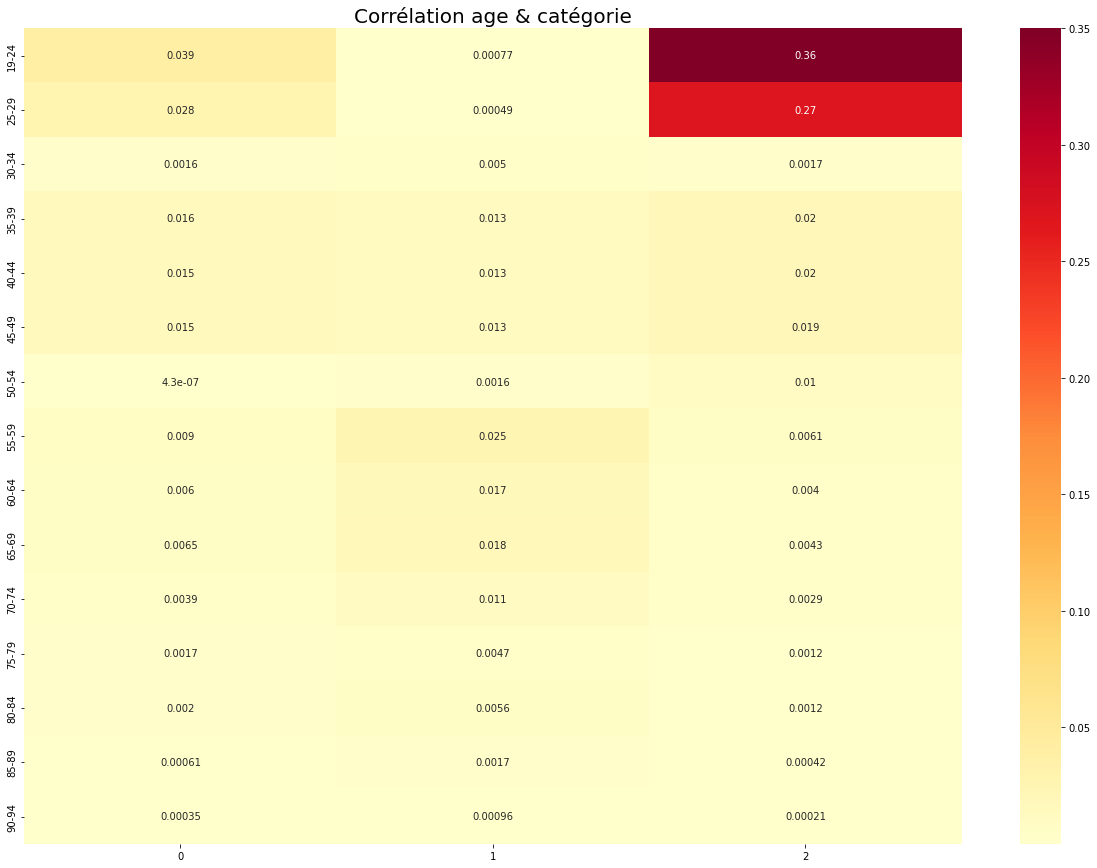

In [33]:
x2 = ((np_age_categ-exp)**2)/exp
x2 = pd.DataFrame(x2, index=["19-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80-84","85-89","90-94","Total_y"], columns=("0","1","2","Total_x"))
mesure = x2.sum().sum()
reslt = exp/x2.to_numpy()
reslt = x2/mesure
reslt = reslt.drop("Total_y")
reslt = reslt.drop("Total_x", axis=1)
plt.figure(figsize=[21,15])
sns.heatmap(reslt, cmap=("YlOrRd"), annot=reslt, vmax=0.35)
plt.title("Corrélation age & catégorie", fontsize = 20)
plt.savefig("age_categ.png")